In [1]:
# Will Hollingsworth, Holly Lonergan, Colton Murray, Alexander Shively

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Getting our data into Python

We're going to start off with reading our given `insurance.csv` file; which is a little tricky considering it has a bunch of non-numeric information like the region.
So we're also going to be stripping out the columns and headers, and converting the data into numbers that we can work with.

In [2]:
# Load the csv as a numpy array of strings, 
# because we need to strip out the sex, smoker, and region columns to utilize the numbers
raw_data = np.loadtxt('insurance.csv', delimiter=',', dtype=str)

# Just putting "raw_data" here prints out said variable as it would in a normal console
raw_data

array([['age', 'sex', 'bmi', ..., 'smoker', 'region', 'charges'],
       ['19', 'female', '27.9', ..., 'yes', 'southwest', '16884.924'],
       ['18', 'male', '33.77', ..., 'no', 'southeast', '1725.5523'],
       ...,
       ['18', 'female', '36.85', ..., 'no', 'southeast', '1629.8335'],
       ['21', 'female', '25.8', ..., 'no', 'southwest', '2007.945'],
       ['61', 'female', '29.07', ..., 'yes', 'northwest', '29141.3603']],
      dtype='<U11')

In [3]:
# First lets delete the columns we don't need
# (see numpy's delete documentation)
stripped = np.delete(raw_data, [1, 4, 5], axis=1)

# We also need to remove the first row which is just the names of each column
stripped = np.delete(stripped, [0], axis=0)

# Next lets convert the strings into usable numbers
clean_data = np.matrix(stripped, dtype=float)

clean_data

matrix([[1.90000000e+01, 2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
        [1.80000000e+01, 3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
        [2.80000000e+01, 3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
        ...,
        [1.80000000e+01, 3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
        [2.10000000e+01, 2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
        [6.10000000e+01, 2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [4]:
# Lets make a helper function to split up our X and Y matrices
def split_input_output(data):
    """
    Splits the input array into two seperate sets:
        * the feature values
        * the output value
        
    :returns: (tuple) the features are the first element, the outputs are the second
    """
    return np.delete(data, [data.shape[1] - 1], axis=1), data[:, -1]

In [5]:
# Test it out!
x, y = split_input_output(clean_data)

In [6]:
y

matrix([[16884.924 ],
        [ 1725.5523],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.3603]])

In [7]:
x

matrix([[19.  , 27.9 ,  0.  ],
        [18.  , 33.77,  1.  ],
        [28.  , 33.  ,  3.  ],
        ...,
        [18.  , 36.85,  0.  ],
        [21.  , 25.8 ,  0.  ],
        [61.  , 29.07,  0.  ]])

# Selecting Training and Testing data

The meat of this assignment involves doing multiple trials with differing ratios of training and testing data. So we need a convenient way to split up the data we now have into two sets.

In [8]:
def get_sets(data, split):
    """
    Convenience function that randomly selects a training and test set from the input data.
    
    :param data: (ndarray) the data you want to split
    :param split: (float) the percentage of the data you want to be TRAINING data
    
    :returns: (tuple) a tuple where the first element is the training set, and the second element is the test set
    """
    # Randomly shuffle the order from a copy of the data
    shuffled = data.copy()
    np.random.shuffle(shuffled)

    row_count = data.shape[0]

    # Stick in values of 1.0 at the beginning of the shuffled data, for the bias value
    bias = np.ones((row_count, 1))
    shuffled = np.hstack((bias, shuffled))

    # calc the number of samples, assumes the input samples are seperated by row
    training_count = round(row_count * split)
    
    training_set = shuffled[:training_count]
    test_set = shuffled[training_count:]
    
    return training_set, test_set

In [9]:
# Lets do an example of splitting our data into two sets, 50/50 split
training_set, test_set = get_sets(clean_data, .50)

# Print the size of the two sets
print(training_set.shape)
print(test_set.shape)

print('*' * 80)

# Print the first 5 data points of each, for the fun of it
print(training_set[:5])
print('*' * 80)
print(test_set[:5])
print('*' * 80)

# Also we can call `split_input_output` on these
training_x, training_y = split_input_output(training_set)
test_x, test_y = split_input_output(test_set)

print(f'first 5 feature sets = \n{training_x[:5]}\n')
print(f'first 5 outputs = \n{training_y[:5]}\n')

(669, 5)
(669, 5)
********************************************************************************
[[1.00000000e+00 4.60000000e+01 1.98550000e+01 0.00000000e+00
  7.52670645e+03]
 [1.00000000e+00 2.60000000e+01 4.24000000e+01 1.00000000e+00
  3.41032400e+03]
 [1.00000000e+00 2.00000000e+01 3.53100000e+01 1.00000000e+00
  2.77242887e+04]
 [1.00000000e+00 6.30000000e+01 4.13250000e+01 3.00000000e+00
  1.55551887e+04]
 [1.00000000e+00 1.80000000e+01 3.13500000e+01 4.00000000e+00
  4.56118850e+03]]
********************************************************************************
[[1.00000000e+00 4.10000000e+01 3.57500000e+01 1.00000000e+00
  4.02736455e+04]
 [1.00000000e+00 3.20000000e+01 3.31550000e+01 3.00000000e+00
  6.12879745e+03]
 [1.00000000e+00 4.30000000e+01 2.50800000e+01 0.00000000e+00
  7.32504820e+03]
 [1.00000000e+00 2.20000000e+01 3.17300000e+01 0.00000000e+00
  2.25479670e+03]
 [1.00000000e+00 3.60000000e+01 3.38200000e+01 1.00000000e+00
  5.37745780e+03]]
******************

# Linear Regression

Now that we have data that we can actually do regression on, lets whip up some functions to do the normal equation and also apply our hypotheses to test data to get estimates.

In [10]:
def normal_eq(x_matrix, y_matrix):
    """
    Does the normal equation! theta = (transpose(x) * X)^-1 * transpose(x) * y    
    
    :param x_matrix: (matrix) set of feature values
    :param y_matrix: (matrix) set of output values
    
    :returns: (matrix) a 1-dimensional array of THETA VALUES!!!! (the hypothesis)
    """
    return (x_matrix.getT() * x_matrix).getI() * x_matrix.getT() * y_matrix
    

In [11]:
h = normal_eq(training_x, training_y)
h
# The first value is the bias (the y intercept)
# Second value: slope for age
# Third value: slope for BMI
# Fourth value: slope for number of kids

matrix([[-5145.91764905],
        [  213.05043998],
        [  299.73222027],
        [  566.49235767]])

In [12]:
def hypothesize(h_matrix, test_x_matrix):
    """
    Applies a set of hypothesis values to some test feature values to get an estimated output.
    
    :param h_matrix: the hypothesis (or theta) matrix
    :param test_x_matrix: the matrix of feature values that we want to predict on
    
    :returns: a matrix of predicted output values!
    """
    return test_x_matrix * h_matrix

In [13]:
# Get some estimated values!
hypothesis_y = hypothesize(h, test_x)

In [14]:
# Just "productizing" the above
def plot(hypothesis, test_features, test_output, title, labels):
    b = float(hypothesis[0,0])
    plt.figure(figsize=(15,3))

    for i in range(1, len(hypothesis)):
        x = test_features[:, i].flatten()
        y = test_output.flatten()

        m = float(hypothesis[i, 0])

        xh = np.arange(x.min(), x.max() + 1)
        yh = xh * m + b

        plt.subplot(130 + i)
        plt.plot(x,y,'bo', markersize=3)
        plt.plot(xh, yh, 'r--', linewidth=3)
        plt.xlabel(labels[i - 1])

    plt.suptitle(title)
    plt.show()

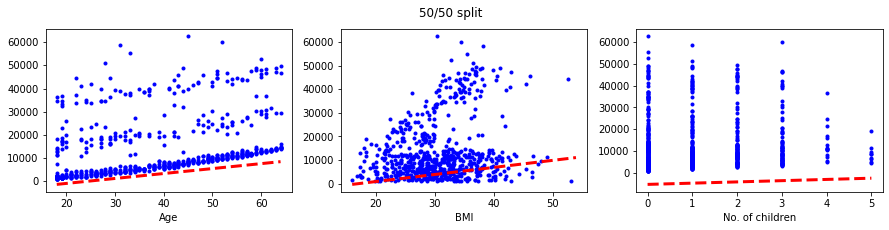

In [15]:
plot(h, test_x, test_y, "50/50 split", ["Age", "BMI", "No. of children"])

# Training and Test Error

The error for the training and test sets can then be found using the mean square error (MSE).

In [16]:
import math

# First define a function to calculate the MSE for data set
def mean_square_error(h_y_matrix, y_matrix):
    # h and y are expected to be the same size
    rows = y_matrix.shape[0]
    
    # Calculate the sum of the square differences between h(x) and y(x)
    sum_squares = sum((h_y_matrix[i,0] - y_matrix[i,0])**2 for i in range(0, rows))
    return sum_squares / rows

In [17]:
# Determine the MSE for the training set to find the 'modeling power'

# Get some estimated values for the training set!
training_hypothesis_y = hypothesize(h, training_x)

mean_square_error(training_hypothesis_y, test_y)

179679160.23979467

In [18]:
# Determine the MSE for the test set to find the 'generalization power'

mean_square_error(hypothesis_y, test_y)

139241406.87730762

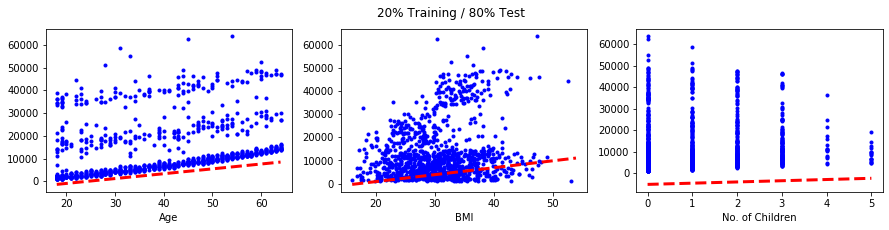

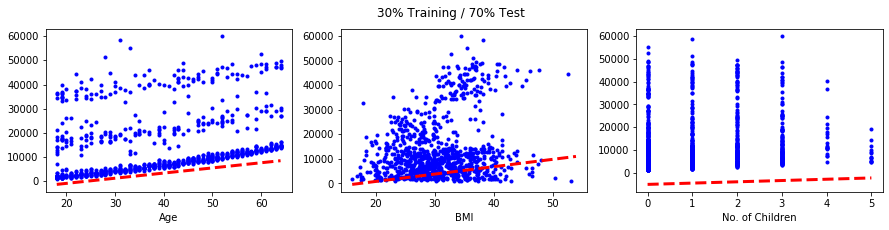

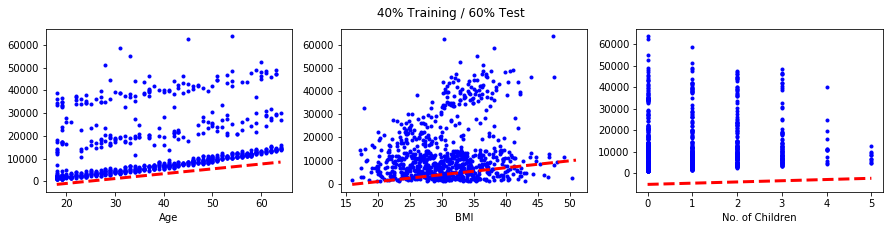

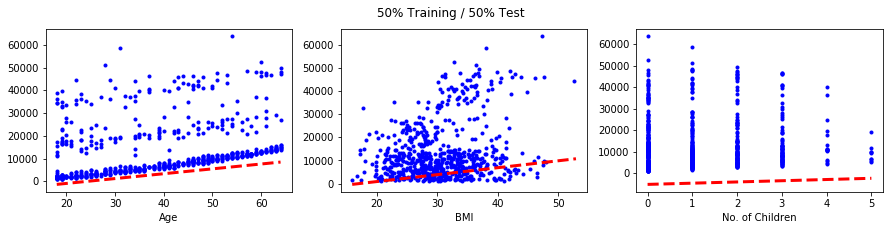

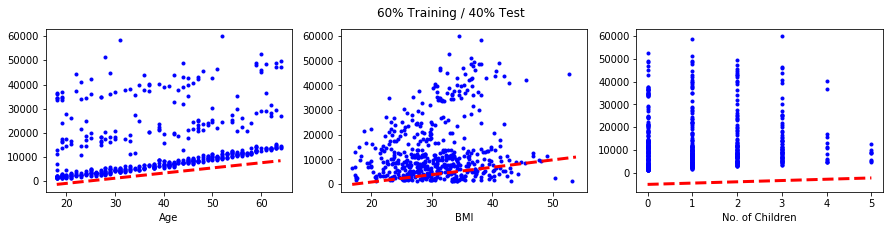

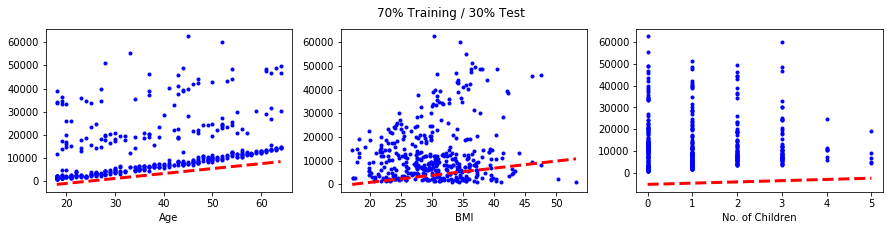

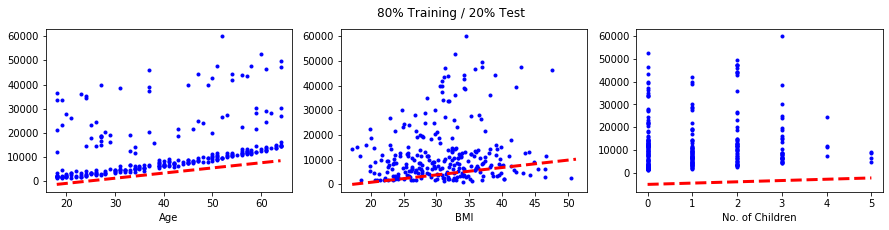

In [19]:
# capture error
training_error = []
test_error = []

# Do all of the trials at once!
for i in range(2, 9, 1):
    training_data, test_data = get_sets(clean_data, i / 10)
    training_x, training_y = split_input_output(training_data)
    test_x, test_y = split_input_output(test_data)
    
    hypothesis = normal_eq(training_x, training_y)
    
    plot(h, test_x, test_y, f'{i*10}% Training / {100 - (i * 10)}% Test', ['Age', 'BMI', 'No. of Children'])
    
    training_h = hypothesize(hypothesis, training_x)
    test_h = hypothesize(hypothesis, test_x)
    
    training_error.append(mean_square_error(training_h, training_y))
    test_error.append(mean_square_error(test_h, test_y))

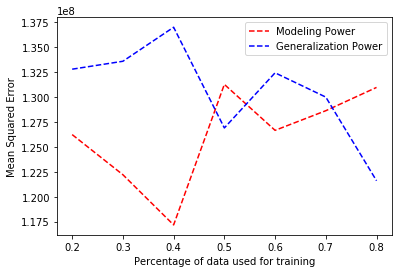

In [20]:
x = np.arange(.2, .9, .1)
plt.plot(x,training_error, '--r', label='Modeling Power') # modeling
plt.plot(x, test_error, '--b', label='Generalization Power') # generalization
plt.legend()
plt.xlabel("Percentage of data used for training")
plt.ylabel("Mean Squared Error")
plt.show()

# Analysis

As you can see above the higher the proportion of data that is used for training generally results in higher modeling power. But as modeling power increases, our estimation loses generalization power. Overall we noticed that the error values were highly variable, and that our linear regression does not perform well with this data set. This is likely due to this specific combination of features not being very linearly correlated with insurance premium. 

Another interesting thing we discovered was that the bias coefficient behaves differently when performing the linear regression on only one of the three features. When calculated with a single feature the bias is always positive, but when calculated with multiple features the bias is very negative. This is what causes our figures above to show the regression line curiously below where one might expect them. 